In [1]:
import pandas as pd

nyc = pd.read_csv(r"C:\Users\Ryan\Desktop\summer 24\AI\datasetstuff\linear regression\ave_hi_nyc_jan_1895-2018.csv", header='infer')

In [2]:
nyc

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0
...,...,...,...
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4


In [3]:
nyc.columns = ['Date', 'Temp', 'Anomaly']

In [4]:
nyc['Date'] = nyc.Date.floordiv(100).astype(int)

nyc

,Date,Temp,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0
...,...,...,...
119,2014,35.5,-1.9
120,2015,36.1,-1.3
121,2016,40.8,3.4
122,2017,42.8,5.4


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test= train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temp.values.reshape(-1,1), random_state=11)

In [6]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [7]:
print(lin_reg.coef_,
lin_reg.intercept_)

[[0.01939167]] [-0.3077982]


In [8]:
# y = mx + c

'''so our model
m = coefficient
c = intercept

so we can predict y (temp) by
coefficient * date + intercept
'''

print((lin_reg.coef_ * 3024) + lin_reg.intercept_)

def compute(date):
    return lin_reg.coef_ * date + lin_reg.intercept_
    

[[58.33262184]]


In [9]:
predicted = lin_reg.predict(X_test)
expected = y_test

# for p, e in zip(predicted, expected):
#     print(f'Predicted: {p:.2f}, Expected: {e:.2f}')

In [10]:
import seaborn as sns

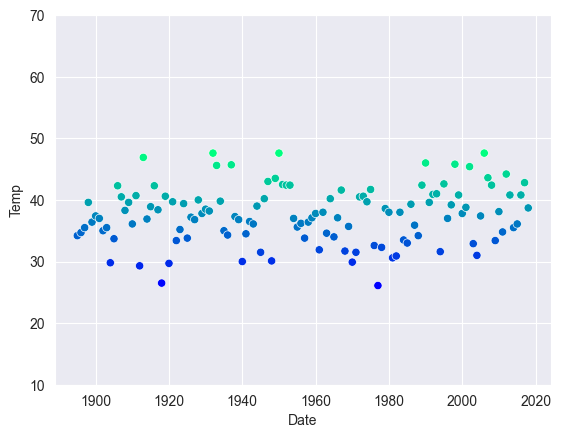

In [14]:
axes = sns.scatterplot(data=nyc,x='Date',y='Temp',hue='Temp', palette='winter', legend=False)
axes.set_ylim(10, 70)
x = np.array(min(nyc.Date.values), max(nyc.Date.values))
y = compute(x)

line = plt.plot(x, y)